In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'Scatter Plot')

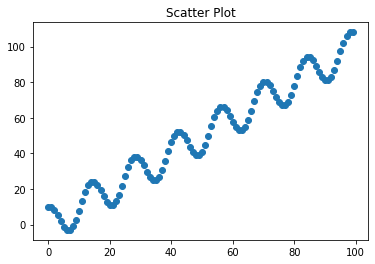

In [3]:
# Create a DataFrame.
learning_progress = pd.DataFrame()

# Add a range of 100 dates, starting January 1, 2017.
learning_progress['date'] = pd.date_range(start='2017-01-01', periods=100)

# Add linearly increasing `knowledge` and oscillating `confidence`.
learning_progress['knowledge'] = np.arange(0, 100)
learning_progress['confidence'] = 10 * np.cos(np.arange(0, 100) * np.pi / 7) + np.arange(0, 100)

#Visualization
plt.scatter(learning_progress.knowledge, learning_progress.confidence)
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Linked Scatter Plot')

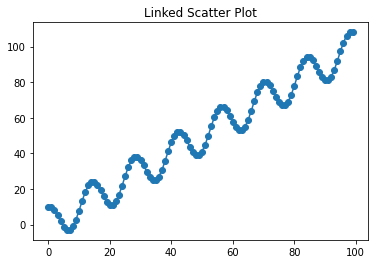

In [4]:
plt.scatter(learning_progress.knowledge, learning_progress.confidence)
plt.plot(learning_progress.knowledge, learning_progress.confidence)
plt.title('Linked Scatter Plot')

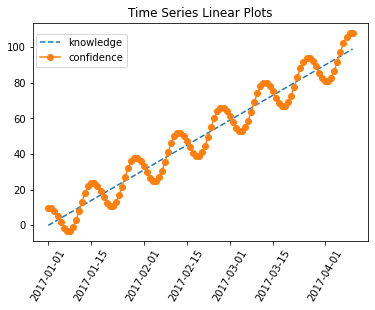

In [5]:
plt.plot(learning_progress.date, learning_progress.knowledge, '--', label="knowledge")
plt.plot(learning_progress.date, learning_progress.confidence, 'o-', label="confidence")
plt.xticks(rotation=60)
plt.legend(loc = (.01,.8))
plt.title('Time Series Linear Plots')
plt.show()

In [6]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

# Note that for scikit-learn, you must convert your data to numeric.
X = pd.DataFrame(pd.to_numeric(learning_progress['date']))
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

0.9431566970528262

In [7]:
lm.coef_[0]

1.1635327364626977e-14

In [8]:
# Convert coefficient from nanoseconds to days.
lm.coef_[0] * 1000000000 * 24 * 60 * 60

1.0052922843037708

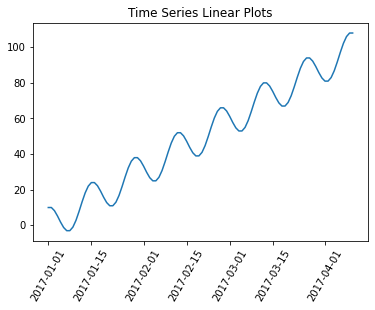

In [9]:
plt.plot(learning_progress.date, learning_progress.confidence)
plt.xticks(rotation=60)
plt.title('Time Series Linear Plots')
plt.show()

In [10]:
learning_progress['day_of_week'] = learning_progress.date.apply(
    lambda x: str(dt.datetime.weekday(x)))

X = pd.get_dummies(learning_progress.day_of_week)
X['date'] = pd.to_numeric(learning_progress.date) / (1000000000 * 24 * 60 * 60)
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

0.943251607217556

In [11]:
print(X.columns)
print(lm.coef_)

Index(['0', '1', '2', '3', '4', '5', '6', 'date'], dtype='object')
[ 0.41694745 -0.17042941 -0.17573703 -0.18104465 -0.18635228 -0.1916599
  0.48827582  1.00530762]


Text(0.5, 1.0, 'Cosine Function')

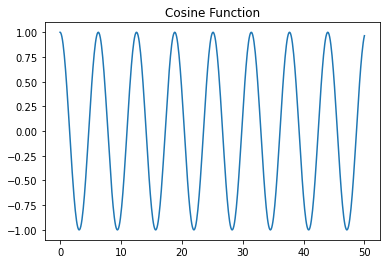

In [12]:
x = np.linspace(0, 50, 500)
plt.plot(x, np.cos(x))
plt.title('Cosine Function')

In [13]:
X = pd.DataFrame()
X['date'] = pd.to_numeric(learning_progress.date) / (1000000000 * 24 * 60 * 60)

# Note that you're subtracting 17,167 from `date`.
# This is to normalize it so that it starts at zero.
# This aligns the peak of the curve with the start of the cosine function.

X['cos_date'] = np.cos((X.date - 17167) * np.pi / 3.5)
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

0.9432077395162712

In [14]:
lm.coef_

array([1.00518266, 0.30084893])